# Finding the Best Markets to Advertise In

In this notebook we will be exploring different markets that our company can advertise our courses on learning to program.  We will look at a variety of different metrics to find which will be best suited for us.  The goal in the end is to find the two best markets to advertise in, resulting in the best use of our marketing funds.

In [31]:
# Read in the dataset
import pandas as pd
Survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
# Get the size of the dataset
Survey.shape

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18175, 136)

In [32]:
# Preview the dataset
Survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# See all the different columns in the dataset
list(Survey)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

It appears as if the importan fields for us would be Age, AttendedBootcamp, BotcampFinish, BootcampRecommend, EmploymentField, EmploymentStatus, and all the different JobInterest fields.

As you can see above, we are using a ready-made data set instead of gathering our own data via a survey.  This is simply due to the logistics of gathering a survey of 18000+ people and this was done by the FCC which should be reputable.  

In this data set it is a list of new coders and what resources they used to learn how to code as well as work and personal information about them.  This survey can be downloaded at https://github.com/freeCodeCamp/2017-new-coder-survey if you would like to take a look at it yourself.

In [34]:
# Get what percent of people responded to each interest field
Survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                                     2.030892
  Mobile Developer                                                                                                                                                                         1.673341
Game Developer      

In [35]:
# Remove all responses that didnt have a response in the JobRoleInterest Field
InterestNoNulls = Survey['JobRoleInterest'].dropna()
# Create a dataframe that has each response's interests split
SplitInterests = InterestNoNulls.str.split(',')
# Counts the number of interests for each response
InterestAmounts = SplitInterests.apply(lambda x: len(x))
# Gets the percentage of responses by the number of interests
InterestAmounts.value_counts(normalize = True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

# Analysis of the Distribution

Above, you can see the distribution of the fields people are interested in.  You can see that while it may seem a majority of people are only interested in 1 field due to their higher distribution, if you add up all the single interest fields you'll see they only make up about 30% of the respondents.  

Even though most people are interested in more than 1 field this survey is still representative because our company offers courses mainly focused on mobile and web development and a large portion of the population has at least some interest in mobile or web development.

In [36]:
# Gets the percentage of people interested in Web or Mobile Development
WebOrMobile = InterestNoNulls.str.contains('Web Developer|Mobile Developer')
WebOrMobileFreq = WebOrMobile.value_counts(normalize = True) * 100
print(WebOrMobileFreq)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


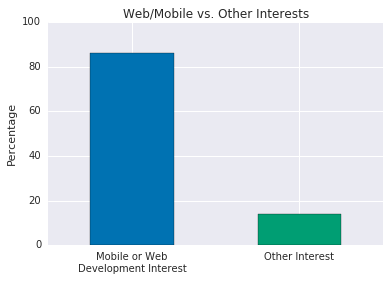

In [37]:
#Creates a bar chart to show how much interest there is in Web and Mobile Development
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

WebOrMobileFreq.plot.bar()
plt.title('Web/Mobile vs. Other Interests')

plt.ylabel('Percentage')
plt.xticks([0,1],
           ['Mobile or Web\nDevelopment Interest','Other Interest'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

In the graph above you can see that over 80% of the survey was interested in Mobile or Web Development to some degree so this survey is perfect for figuring out the best market to advertise since so much of the populations interest matches our offerings. 

# New Coder Locations

In [38]:
SurveyNoNull = Survey[Survey['JobRoleInterest'].notnull()].copy()

# Gets the total number of respondees that live in each country as well as
# the percent in each country.
TotalLivingInCountry = SurveyNoNull['CountryLive'].value_counts()
LivingInCountryPercent = SurveyNoNull['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {'Total Living In Country': TotalLivingInCountry,
                    'Percent Living In Country': LivingInCountryPercent})

,Percent Living In Country,Total Living In Country
United States of America,45.700497,3125
India,7.721556,528
United Kingdom,4.606610,315
Canada,3.802281,260
Poland,1.915765,131
Brazil,1.886517,129
Germany,1.828020,125
Australia,1.637906,112
Russia,1.491664,102
Ukraine,1.301550,89


Above you can see the United States makes up 45.7% of the population making that the first choice to advertise in.  It is followed by India with 7.7%.  However, the United Kingdom and Canada are not too far behind, at 4.6% and 3.8% respectively.  

This makes things interesting because while India had more people, they may not be as willing to spend on learning to code as people from a more well developed country like the UK and Canada.  We will need to go more in depth on how much people are willing to spend to find out the second choice.

In [39]:
# Gets the average money spent on learning to program each month
SurveyNoNull['MonthsProgramming'].replace(0,1, inplace = True)
SurveyNoNull['MonthlySpend'] = SurveyNoNull['MoneyForLearning'] / SurveyNoNull['MonthsProgramming']

In [40]:
# Counts the number of responses where the monthly spend column is null
SurveyNoNull['MonthlySpend'].isnull().sum()

675

In [41]:
# Removes the null monthly spend responses as well as responses where the 
# CountryLive column is null
SurveyNoNull = SurveyNoNull[SurveyNoNull['MonthlySpend'].notnull()]
SurveyNoNull = SurveyNoNull[SurveyNoNull['CountryLive'].notnull()]

In [42]:
# Gets the total number of people living in each country for the top 5 countries
SurveyNoNull['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [43]:
# Gets the average monthly spend for the top 4 countries
CountrySpend = SurveyNoNull.groupby('CountryLive').mean()
CountrySpend['MonthlySpend'][['United States of America',
                            'India','United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlySpend, dtype: float64

The above result is somewhat strange.  Based on the GDP of the 4 countries, you would expect the United States, Canada and the UK to have about the same average spend and India to have a lower average spend.  However, you can see that India is above both the UK and Canada which are both less than half the US average monthly spend.  

Perhaps this is due to the sample size of the Survey and 250 simply is not enough to get a proper average.  I believe if we had a larger survey size both of these values would increase to be closer in line with the US.  However, it could also be that these results are correct and India is willing to spend a larger percent of their income on these programs.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


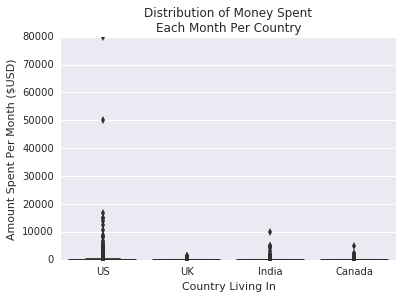

In [44]:
#Creates a distribution chart for each of the countries to find any outliers
import seaborn as sns
OnlyRelevantCountries = SurveyNoNull[SurveyNoNull['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'MonthlySpend', x = 'CountryLive', data = OnlyRelevantCountries)
plt.title('Distribution of Money Spent\nEach Month Per Country')
plt.xlabel('Country Living In')
plt.ylabel('Amount Spent Per Month ($USD)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

In [45]:
# Removes all responses over $20000/month as outliers
OnlyRelevantCountries = OnlyRelevantCountries[OnlyRelevantCountries['MonthlySpend'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


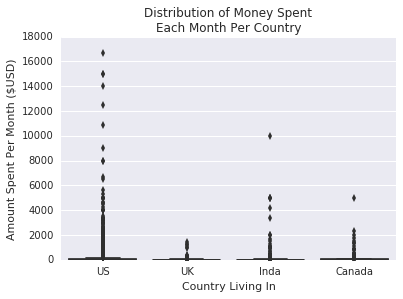

In [46]:
# creates another distribution chart thats now more zoomed in to find more outliers
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive', data = OnlyRelevantCountries)
plt.title('Distribution of Money Spent\nEach Month Per Country')
plt.xlabel('Country Living In')
plt.ylabel('Amount Spent Per Month ($USD)')
plt.xticks(range(4),['US','UK','Inda','Canada'])
plt.show()

In [47]:
CountrySpend = OnlyRelevantCountries.groupby('CountryLive').mean()
CountrySpend['MonthlySpend']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpend, dtype: float64

In [48]:
# Find the India outliers to find out more about them
IndiaOutliers = OnlyRelevantCountries[
    (OnlyRelevantCountries['CountryLive'] == 'India') &
    (OnlyRelevantCountries['MonthlySpend'] > 2500)]
IndiaOutliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


These outliers in India do not seem justified as they have not done any bootcamps which would be the main expense they could have outside of a degree, so maybe they just didn't understand the question correct and put in how much they were paying for their degree.

In [49]:
# Drops all India Outliers
OnlyRelevantCountries = OnlyRelevantCountries.drop(IndiaOutliers.index)

In [50]:
# Find the Canada outliers to find out more about them
CanadaOutliers = OnlyRelevantCountries[
    (OnlyRelevantCountries['CountryLive'] == 'Canada') &
    (OnlyRelevantCountries['MonthlySpend'] > 4000)]
CanadaOutliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [51]:
CanadaOutliers['MonthsProgramming']

13659    2.0
Name: MonthsProgramming, dtype: float64

This seems to be an actual amount since he has only been programming for 2 months and took part in the bloc.io bootcamp which costs around $9500

In [52]:
CountrySpend = OnlyRelevantCountries.groupby('CountryLive').mean()
CountrySpend['MonthlySpend']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpend, dtype: float64

In [53]:
# Find the US outliers to find out more about them
USOutliers = OnlyRelevantCountries[
    (OnlyRelevantCountries['CountryLive'] == 'United States of America') &
    (OnlyRelevantCountries['MonthlySpend'] > 6000)]
USOutliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [54]:
USNoBootCamp = OnlyRelevantCountries[
    (OnlyRelevantCountries['CountryLive'] == 'United States of America') &
    (OnlyRelevantCountries['MonthlySpend'] > 6000) &
    (OnlyRelevantCountries['AttendedBootcamp'] == 0)]

USLessThan3Mos = OnlyRelevantCountries[
    (OnlyRelevantCountries['CountryLive'] == 'United States of America') &
    (OnlyRelevantCountries['MonthlySpend'] > 6000) &
    (OnlyRelevantCountries['MonthsProgramming'] < 3) &
    (OnlyRelevantCountries['AttendedBootcamp'] == 1)]

In [55]:
OnlyRelevantCountries = OnlyRelevantCountries.drop(CanadaOutliers.index)

In [56]:
OnlyRelevantCountries = OnlyRelevantCountries.drop(USNoBootCamp.index)

In [57]:
OnlyRelevantCountries = OnlyRelevantCountries.drop(USLessThan3Mos.index)

In [58]:
# Gets the Average Monthly spend after all the outliers have been dropped
CountrySpend = OnlyRelevantCountries.groupby('CountryLive').mean()
CountrySpend['MonthlySpend']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    144.888094
Name: MonthlySpend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


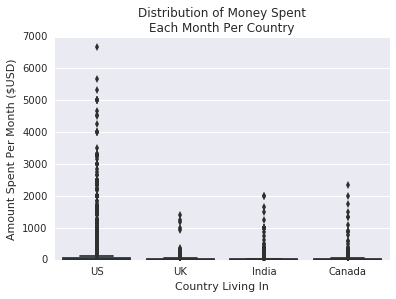

In [59]:
# Shows the final distribution chart
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive', data = OnlyRelevantCountries)
plt.title('Distribution of Money Spent\nEach Month Per Country')
plt.xlabel('Country Living In')
plt.ylabel('Amount Spent Per Month ($USD)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

While Canada has a 50% higher average spend than India, they have substantially fewer people and India's average spend still meets our $59 monthly subscription.  This makes India the pretty obvious choice as we wouldn't really be able to take advantage of that 50% higher average monthly spend that Canada has.

It does not really make much sense to split up our advertising budget between more than 2 countries since we would expect to only have about half the subscribers from Canada as we would from India.  It would however, make sense to split up our advertising money unequally between the two countries.  Seeing as the US has over 6x the number of new coders as India that's where the majority of our potential customers will be located.

It could make sense to advertise only in the US depending on how much that extra 25-30% of our advertising budget would help to increase subscriptions in the US and if we could potentially get more new customers from the US than India with that extra marketing money it would make the most sense.

It would also make the most sense to send our marketing team our findings and let them decide where to put the money.  This is because they likely have a better idea of how much money will be needed for this campaign and what would be most effective to get the most customers.

# In Conclusion

We found that India and the United States are the two best target markets for us to advertise in.  We also found that once the data was cleaned up, things became much more clear in terms of which countries were best.  There are other dat sets we could look at to either change or confirm this decision however, the results were pretty conclusive.